<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Muskan/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import os

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("All pkgs have been imported successfully.")

All pkgs have been imported successfully.


In [19]:
dfXRP = pd.read_csv("XRP.csv")
print("Displaying dataset")
dfXRP

Displaying dataset


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570
...,...,...,...,...,...,...,...
832,2016-12-27,0.006326,0.006188,0.006326,0.006199,2471000,0.006199
833,2016-12-28,0.006336,0.006126,0.006193,0.006173,2064130,0.006173
834,2016-12-29,0.006354,0.006167,0.006180,0.006341,1345050,0.006341
835,2016-12-30,0.006455,0.006338,0.006352,0.006426,1379470,0.006426


In [20]:
nRow,nCol = dfXRP.shape

nRow, nCol = dfXRP.shape
print("Number of columns in the dataset =",nCol)
print("Number of rows in the dataset    =",nRow)
print("Is there any null value in the dataset ?",dfXRP.isnull().values.any())




Number of columns in the dataset = 7
Number of rows in the dataset    = 837
Is there any null value in the dataset ? False


In [21]:
print("Display a column-wise null value count\n")
dfXRP.isnull().sum()

Display a column-wise null value count



Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [22]:
print("Getting rid of the null data")
dfXRP.dropna(inplace=True)
dfXRP.head()

Getting rid of the null data


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570


In [23]:
print("Number of null values dropped =",nRow - len(dfXRP))

Number of null values dropped = 0


In [24]:
datesLen = nRow
#print(nRow)
datesArr = []
datesArr = [1 for i in range(datesLen)]


# Making the x-values for the dates
for i in range(0,837):
    datesArr[i] = i+1
    
##print(datesArr,"\n")


    
x = dfXRP['Open'].values
x1 = dfXRP['Close'].values
x2 = dfXRP['High'].values
x3 = dfXRP['Low'].values

print("These are the open values")
print(x,"\n")

print("These are the close values")
print(x1,"\n")

print("These are the high values")
print(x2,"\n")

print("These are the low values")
print(x3,"\n")

print("These are the volume XRP values")

y = dfXRP['Volume'].values
print(y,"\n")

print("These are the adjusted close values")

y1 = dfXRP['Adj Close'].values
print(y1,"\n")

These are the open values
[0.00512251 0.00539815 0.00513386 0.00494179 0.00476827 0.00456111
 0.0046552  0.00460974 0.00466996 0.00472183 0.00460747 0.00470576
 0.00527948 0.00470523 0.00464498 0.00475516 0.00487602 0.00502388
 0.00493456 0.00477738 0.00473096 0.00476936 0.00478738 0.00482412
 0.0048732  0.00475445 0.00485316 0.00479398 0.00487182 0.00482495
 0.00485525 0.00490429 0.0049642  0.00494538 0.00507192 0.00518983
 0.00518517 0.00514275 0.00508271 0.00471978 0.00454632 0.00489044
 0.00484033 0.00477433 0.00488716 0.00486518 0.00467368 0.0046584
 0.00480949 0.00480606 0.0048611  0.00487793 0.00487686 0.00490441
 0.00491962 0.00489649 0.00489665 0.00512798 0.00502243 0.00520626
 0.00503916 0.00518078 0.00533749 0.00542353 0.00569267 0.00607171
 0.00659095 0.00766919 0.00859513 0.00856136 0.00974221 0.011004
 0.014201   0.0151604  0.0139772  0.0112038  0.0125865  0.0131643
 0.013137   0.0133362  0.0137713  0.014406   0.0147929  0.0134179
 0.0150706  0.0158852  0.0163741  0.01637

In [25]:
stdDevArray = [0 for i in range(nRow)]
annualVolatility = [0 for i in range(nRow)]
numberOfDays = 252*(nRow/365) #this is scaled since 252 days is the number of tradeable days per year. Find the number of years this data took place and
#scale accordingly

for i in range(1,len(x1)):
    stdDevArray[i-1] = ((x1[i]/x1[i-1]) - 1)
    annualVolatility[i-1] = stdDevArray[i-1]*np.sqrt(numberOfDays)

Text(0.5, 1.0, 'Volatility of XRP & Closing XRP values vs Time')

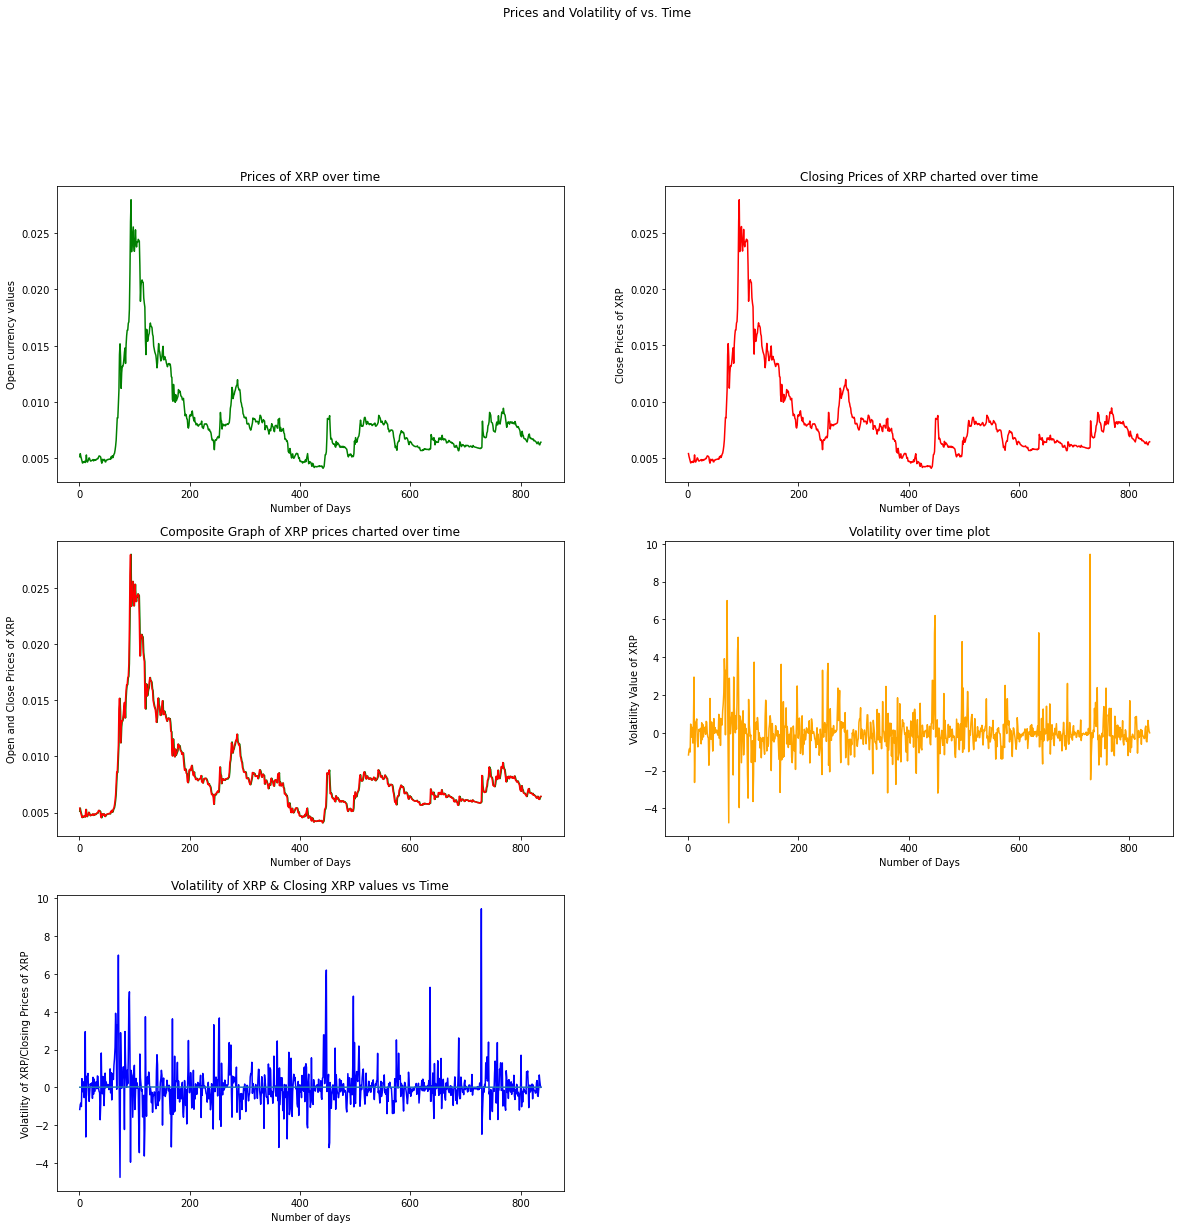

In [26]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
plt.plot(datesArr,x, color='green')
plt.ylabel("Open currency values")
plt.xlabel("Number of Days")
plt.title("Prices of XRP over time")


plt.subplot(4,2,2)
plt.plot(datesArr,x1, color='red')
plt.xlabel("Number of Days")
plt.ylabel("Close Prices of XRP")
plt.title("Closing Prices of XRP charted over time")


## Tried overlaying the opening and closing price on the same graph, but the prices are so close that it looks like a shadow.
plt.subplot(4,2,3)
plt.plot(datesArr,x, color='green')
plt.plot(datesArr,x1, color='red')
plt.xlabel("Number of Days")
plt.ylabel("Open and Close Prices of XRP")
plt.title("Composite Graph of XRP prices charted over time")

plt.subplot(4,2,4)
plt.plot(datesArr,annualVolatility, color='orange')
plt.xlabel("Number of Days")
plt.ylabel("Volatility Value of XRP")
plt.title("Volatility over time plot")
plt.suptitle("Prices and Volatility of vs. Time")

plt.subplot(4,2,5)
plt.plot(datesArr,annualVolatility, color='blue')
plt.plot(datesArr,x1)
plt.xlabel("Number of days")
plt.ylabel("Volatility of XRP/Closing Prices of XRP")
plt.title("Volatility of XRP & Closing XRP values vs Time")

In [27]:
dfXRP.dataframeName = 'XRP.csv'
data = pd.read_csv("XRP.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570


In [28]:
data['Date'] = pd.to_datetime(data['Date'])
data_sort = data.sort_values('Date')
data_sort

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570
...,...,...,...,...,...,...,...
832,2016-12-27,0.006326,0.006188,0.006326,0.006199,2471000,0.006199
833,2016-12-28,0.006336,0.006126,0.006193,0.006173,2064130,0.006173
834,2016-12-29,0.006354,0.006167,0.006180,0.006341,1345050,0.006341
835,2016-12-30,0.006455,0.006338,0.006352,0.006426,1379470,0.006426


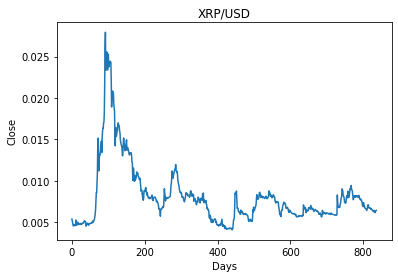

In [29]:
close = data_sort['Close']
ax = close.plot(title='XRP/USD')
ax.set_xlabel('Days')
ax.set_ylabel('Close')
plt.show()